<a href="https://colab.research.google.com/github/Jeevith-Raj/Fradulent_Detection-Confusion_Matrix/blob/main/fradulent_detection_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")


Part - 1 | Data Pre-Processing

In [6]:
print('Total lines of column \n',df.shape)

Total lines of column 
 (5974, 31)


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [9]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5974.0,5974.0,5974.0,5974.0,5974.0,5974.0,5974.0,5974.0,5974.0,5974.0,...,5973.0,5973.0,5973.0,5973.0,5973.0,5973.0,5973.0,5973.0,5973.0,5973.0
mean,2678.0,-0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,65.0,0.0
std,1765.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,192.0,0.0
min,0.0,-12.0,-16.0,-12.0,-5.0,-32.0,-7.0,-13.0,-24.0,-3.0,...,-11.0,-8.0,-8.0,-3.0,-2.0,-1.0,-8.0,-3.0,0.0,0.0
25%,1162.0,-1.0,-0.0,0.0,-1.0,-1.0,-1.0,-0.0,-0.0,-0.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,4.0,0.0
50%,2537.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,16.0,0.0
75%,3782.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0
max,6645.0,2.0,7.0,4.0,6.0,11.0,21.0,34.0,4.0,9.0,...,23.0,4.0,4.0,3.0,2.0,3.0,4.0,5.0,7712.0,1.0


In [10]:
print ('Not Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 1].describe(),2))

Not Fraud %  99.93

count    5970.00
mean       64.97
std       192.43
min         0.00
25%         4.45
50%        15.62
75%        56.48
max      7712.43
Name: Amount, dtype: float64


Fraud %     0.05

count      3.00
mean     256.31
std      264.88
min        0.00
25%      119.96
50%      239.93
75%      384.46
max      529.00
Name: Amount, dtype: float64


Comparing Normal transaction vs Fraud Transaction


Non Fraud %  99.93
Fraud %     0.05


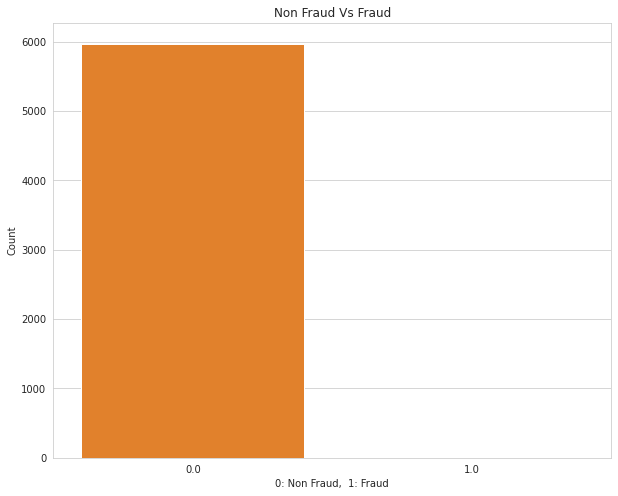

In [11]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(), palette=["C1", "C8"])
plt.title('Non Fraud Vs Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2));

In [12]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]

In [13]:
feature_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [14]:
target

Index(['Class'], dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

Part - 2 | Building Logistic Regression model


In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
lr = LogisticRegression()


In [19]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)



In [20]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [22]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [26]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [44]:
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test)

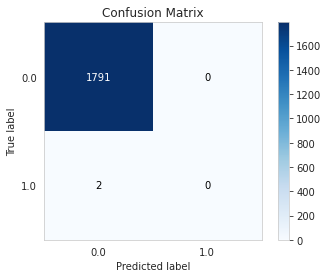

In [45]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [46]:
accuracy_score(y_test, pred)

0.9988845510317903

In [47]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1791
         1.0       0.00      0.00      0.00         2

    accuracy                           1.00      1793
   macro avg       0.50      0.50      0.50      1793
weighted avg       1.00      1.00      1.00      1793



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
fraud_records = len(df[df.Class == 1])

In [56]:
fraud_indices = df[df.Class == 1].index
not_fraud_indices = df[df.Class == 0].index

In [57]:
under_sample_indices = np.random.choice(not_fraud_indices, fraud_records, False)
df_undersampled = df.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:30]
Y_undersampled = df_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

In [52]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

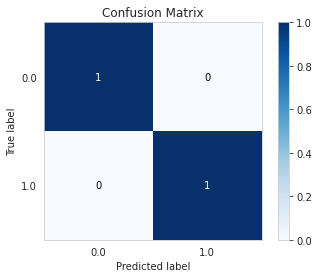

In [53]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [54]:
accuracy_score(Y_undersampled_test, pred)

1.0

In [58]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

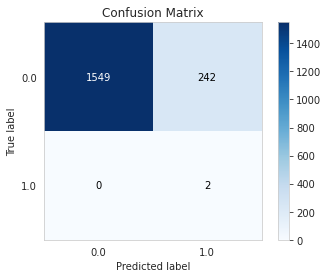

In [60]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [61]:
accuracy_score(y_test, pred)

0.8650306748466258

In [62]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93      1791
         1.0       0.01      1.00      0.02         2

    accuracy                           0.87      1793
   macro avg       0.50      0.93      0.47      1793
weighted avg       1.00      0.87      0.93      1793



In [63]:
from sklearn import metrics 

In [68]:
pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
clf = LogisticRegression(C=1, penalty='l2')
clf.fit(X_undersampled_train, Y_undersampled_train)
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AttributeError: ignored